<a href="https://colab.research.google.com/github/jorge-pichardo07/EDP1/blob/main/MEMBRANA_VIBRATORIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

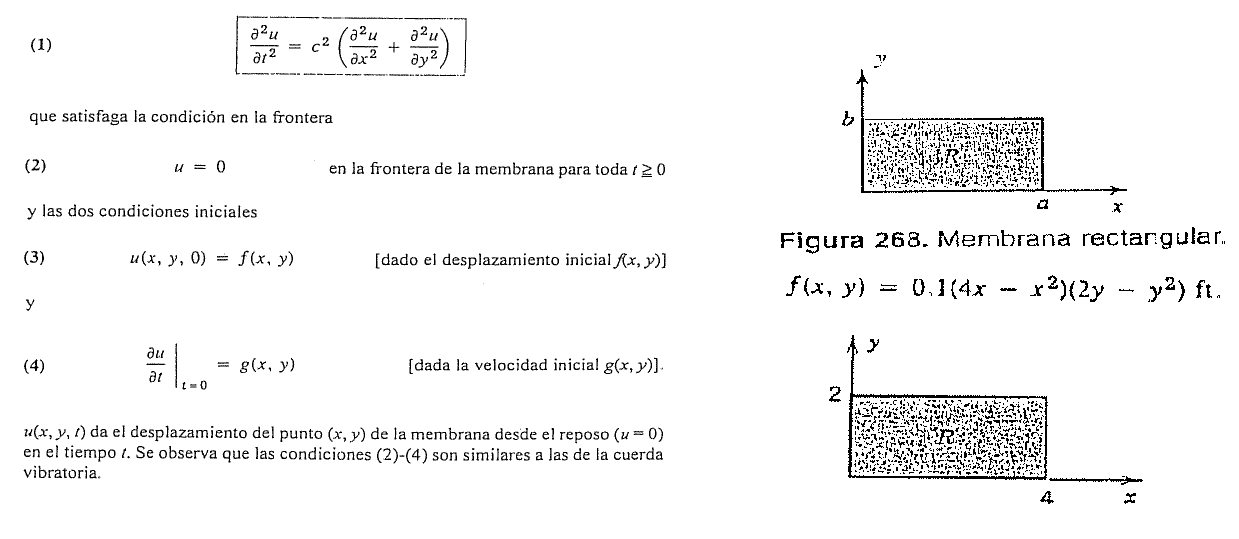

Para resolver la EDP, primero nombremos $U(x,y,t)=F(x,y)G(t)$ al derivar para sustituir en la ecuación de onda $\frac{d^2u}{dt^2}=c^2(\frac{d^2u}{dx^2}+\frac{d^2u}{dy^2})$ tenemos entonces $FG''=c^2(F_{xx}G+F_{yy}G)$

Ahora, separando las variables e igualandolas a una constante por porblema de sturm tenemos que $$\frac{G''}{c^2G}=\frac{F_{xx}+F_{yy}}{F}= -\omega^2$$\
NOtemos que para G
$$G''+ \lambda^2G=0$$ donde $\lambda = c\omega$\
Ahora, para F, tenemos:
$$F_{xx}+F_{yy}+\omega^2F=0$$\
Usaremos la separación de la ecuación de Helmholtz, que dice\
$$F(x,y)=H(x)Q(y)$$ derivando dos veces respecto a $x$ y respecto a $y$ obtememos:
$$\frac{d^2H}{dx^2}Q=-\left(H\frac{d^2Q}{dy^2}+\omega^2HQ \right)$$\
$$\frac{1}{H}\frac{d^2H}{dx^2}=-\frac{1}{Q}\left(H\frac{d^2Q}{dy^2}+\omega^2Q \right)= -k^2$$ como es un problema de sturm tiene que estar igualado a una constante k\
Por lo tanto para la función H tenemos que $$\frac{d^2H}{dx^2}+k^2H=0$$
y para Q
$$\frac{d^2Q}{dy^2}+p^2Q=0$$
donde $p^2=\omega^2-k^2$
Aplicando las condiciones de frontera:
$H(x)=Acos(kx)+Bsen(kx)$ y $Q(y)=C cos(py)+Dsen(py)$, con A,B,C,D constantes.
Ahora, Con la condición de frontera $U=0 \quad\forall t \geq 0 $ entonces:
$$F=HQ=0 \implies x=0,x=a,y=0,y=b$$
asi:
$$H(0)=0,\quad H(a)=0, \quad Q(0)=0, \quad Q(b)=0$$
Usando la tabla dada tenemos:
$$\lambda=\lambda_{mn}=c\pi \sqrt{\frac{m^2}{a^2}+\frac{n^2}{b^2}}, \quad m,n=1,2,3,...$$
Usando $G_{mn}=B_{mn}cos(\lambda_{mn}t)+B^* sen(\lambda_{mn}t)$\
Asi:
$$U_{mn}(x,y,t)=(B_{mn}cos(\lambda_{mn}t)+B^* sen(\lambda_{mn}t))sen(\frac{m\pi x}{a})sen(\frac{m\pi y}{b})$$

Para obtener la solución del problema que satisfacen las condiciones iniciales
$$u(x,y,t)=\sum_{m=1}^\infty \sum_{n=1}^\infty u_{mn}(x,y,t)$$

A partir de esta expresión y de $u(x,y,0)=f(x,y)$ obtenemos:

$$u(x,y,t)=\sum_{m=1}^\infty \sum_{n=1}^\infty B_{mn} sen(\frac{m \pi x}{a}) sen(\frac{m \pi y}{b})=f(x,y)$$


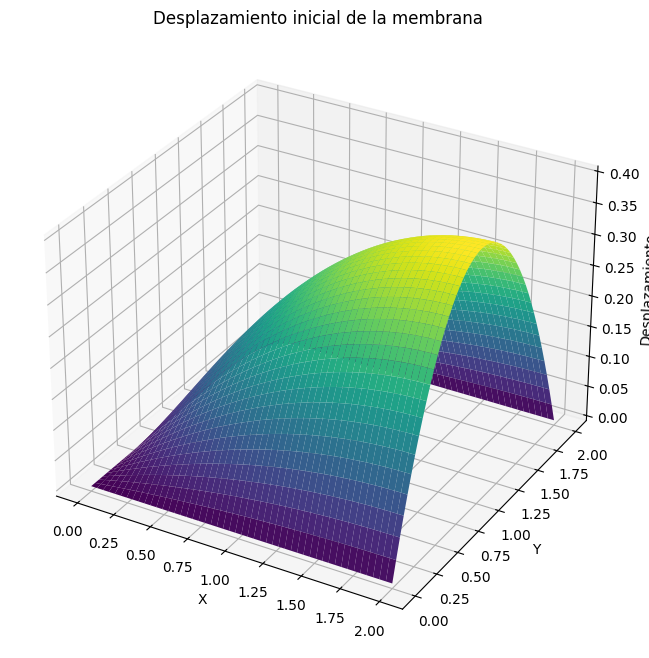

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import dblquad


a = 2
b = 2
c = 1
M = 10
N = 10


def f(x, y):
    return 0.1 * (4*x - x**2) * (2*y - y**2)

def integrand(x, y, m, n):
    return f(x, y) * np.sin(m*np.pi*x/a) * np.sin(n*np.pi*y/b)

A_mn = np.zeros((M+1, N+1))

for m in range(1, M+1):
    for n in range(1, N+1):
        integral, _ = dblquad(integrand, 0, b, 0, a, args=(m, n))
        A_mn[m, n] = (4/(a*b)) * integral

def u(x, y, t, M, N):
    total = 0.0
    for m in range(1, M+1):
        for n in range(1, N+1):
            λ = np.pi * np.sqrt((m/a)**2 + (n/b)**2)
            total += A_mn[m, n] * np.cos(λ * c * t) * np.sin(m*np.pi*x/a) * np.sin(n*np.pi*y/b)
    return total


x = np.linspace(0, a, 50)
y = np.linspace(0, b, 50)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


def init():
    ax.clear()
    ax.set_zlim(-0.5, 0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Desplazamiento')
    return fig,


def update(t):
    ax.clear()
    Z = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(y)):
            Z[i, j] = u(X[i, j], Y[i, j], t, M, N)

    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_zlim(-0.5, 0.5)
    ax.set_title(f'Vibración de la membrana en t = {t:.2f}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Desplazamiento')
    return fig,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 100), init_func=init, blit=False)

plt.tight_layout()
plt.close()


from IPython.display import HTML
HTML(ani.to_jshtml())


Z_initial = f(X, Y)

fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X, Y, Z_initial, cmap='viridis')
ax2.set_title('Desplazamiento inicial de la membrana')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Desplazamiento')
plt.show()